In [ ]:
# Выполнил: Фомин Олег Витальевич; Группа: ФН11-53Б.
# Домашнее задание 2-2; Интерполяционные кубические сплайны.

n = 53 # Номер группы.
N = 13 # Номер студента в списке группы.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Специфический вывод матрицы для LaTex:

def print_matrix(matrix):
    if len(matrix.shape) == 2:
        for i in range(matrix.shape[0]):
            row = ''
            for j in range(matrix.shape[1]):
                kek = matrix[i][j]
                if kek > 0:
                    row += str((round(kek, 5))) + ' & '
                else:
                    row += str((round(kek, 4))) + ' & '
            row = row[:-2]
            row += '\\\\'
            print(row)

    elif len(matrix.shape) == 1:
        row = ''
        for i in range(matrix.shape[0]):

            kek = matrix[i]
            if kek > 0:
                row += str((round(kek, 5))) + ' \\\\ '
            else:
                row += str((round(kek, 4))) + ' \\\\ '
        print(row)

In [ ]:
# Определяем функцию:
def F(t):
    return 2 * np.sin(np.pi * t) * np.sqrt(2 * (58 - n) + N * t**2 * np.sqrt(23 - N))

In [ ]:
# Определяем равномерную сетку A ([0, 2]; step=0.1):
A = np.linspace(0, 2, 21)
print_matrix(A)

0.0 \\ 0.1 \\ 0.2 \\ 0.3 \\ 0.4 \\ 0.5 \\ 0.6 \\ 0.7 \\ 0.8 \\ 0.9 \\ 1.0 \\ 1.1 \\ 1.2 \\ 1.3 \\ 1.4 \\ 1.5 \\ 1.6 \\ 1.7 \\ 1.8 \\ 1.9 \\ 2.0 \\ 


In [ ]:
# Определяем A-сеточную функцию, то есть y_i = F(tau_i); tau_i [from] A:
y = np.array([F(val) for val in A])
print_matrix(y)

0.0 \\ 1.99416 \\ 4.0115 \\ 5.98888 \\ 7.74455 \\ 9.00609 \\ 9.47234 \\ 8.88354 \\ 7.08374 \\ 4.06678 \\ 0.0 \\ -4.777 \\ -9.779 \\ -14.4246 \\ -18.1026 \\ -20.2481 \\ -20.4192 \\ -18.3636 \\ -14.0674 \\ -7.7785 \\ -0.0 \\ 


In [ ]:
# Определим кф a_i и # кф a_i_plus1:
a_i = y[:-1]
a_i_plus1 = y[1:]

print_matrix(a_i)
#print_matrix(a_i_plus1)

#print_matrix(a_i_plus1 - a_i)

0.0 \\ 1.99416 \\ 4.0115 \\ 5.98888 \\ 7.74455 \\ 9.00609 \\ 9.47234 \\ 8.88354 \\ 7.08374 \\ 4.06678 \\ 0.0 \\ -4.777 \\ -9.779 \\ -14.4246 \\ -18.1026 \\ -20.2481 \\ -20.4192 \\ -18.3636 \\ -14.0674 \\ -7.7785 \\ 


In [ ]:
# Достаточно описать конкретное значние прироста шага в сетке:
h_i = 0.1

# Опишем матрицу g_i, имеющую своими компонентами значнеия отношений приращения функции к приращению аргумента:
g_i = (a_i_plus1 - a_i) / h_i
print_matrix(g_i)

19.94163 \\ 20.17339 \\ 19.77381 \\ 17.5567 \\ 12.61535 \\ 4.66256 \\ -5.888 \\ -17.998 \\ -30.1697 \\ -40.6678 \\ -47.7699 \\ -50.0202 \\ -46.4558 \\ -36.7797 \\ -21.4556 \\ -1.7109 \\ 20.55652 \\ 42.96198 \\ 62.88833 \\ 77.78534 \\ 


In [ ]:
# Определяем трехдиагональную-матрицу:
c_matr = np.zeros((len(A) - 3, len(A) - 3))

for i in range(len(A) - 3):
    c_matr[i][i] = 2 * (0.2)
    if i != len(A) - 4:
        c_matr[i][i + 1], c_matr[i + 1][i] = (0.1, 0.1)

print_matrix(c_matr)

0.4 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.1 & 0.4 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.1 & 0.4 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.1 & 0.4 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.1 & 0.4 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.1 & 0.4 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.1 & 0.4 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.1 & 0.4 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.1 & 0.4 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0

In [ ]:
l_matrix = 3 * (g_i[1:-1] - g_i[:-2])
print('Вектор-столбец l (правостоящая матрица СЛАУ):')
print_matrix(l_matrix)

# Решение СЛАУ:
c_matr_inv = np.linalg.inv(c_matr)
c_i = np.dot(c_matr_inv, l_matrix)
print("\nНеполный вектор-столбец решений СЛАУ")
print_matrix(c_i)
c_i = np.insert(c_i, 0, 0)
c_i = np.append(c_i, 0)
print('\nПолный вектор-столбец решений СЛАУ (c_i):')
print_matrix(c_i)

Вектор-столбец l (правостоящая матрица СЛАУ):
0.69528 \\ -1.1987 \\ -6.6513 \\ -14.8241 \\ -23.8584 \\ -31.6518 \\ -36.3298 \\ -36.5151 \\ -31.4943 \\ -21.3065 \\ -6.7508 \\ 10.69312 \\ 29.02831 \\ 45.97237 \\ 59.23396 \\ 66.80237 \\ 67.21637 \\ 59.77905 \\ 

Неполный вектор-столбец решений СЛАУ
1.96763 \\ -0.9177 \\ -10.2841 \\ -24.459 \\ -40.1206 \\ -53.6422 \\ -61.8288 \\ -62.34 \\ -53.9618 \\ -36.7557 \\ -12.0802 \\ 17.56831 \\ 48.73817 \\ 77.76213 \\ 99.93706 \\ 114.8292 \\ 108.76984 \\ 122.25517 \\ 

Вектор-столбец решений СЛАУ (c_i):
0.0 \\ 1.96763 \\ -0.9177 \\ -10.2841 \\ -24.459 \\ -40.1206 \\ -53.6422 \\ -61.8288 \\ -62.34 \\ -53.9618 \\ -36.7557 \\ -12.0802 \\ 17.56831 \\ 48.73817 \\ 77.76213 \\ 99.93706 \\ 114.8292 \\ 108.76984 \\ 122.25517 \\ 0.0 \\ 


In [ ]:
# Определим элементы b_i"
b_i = g_i[:-1] - (0.1 / 3) * (2 * c_i[:-1] + c_i[1:])

print('Неполный массив элементов вектора b:')
print_matrix(b_i)
b_i = np.append(b_i, b_i[-1] + 0.1 * (c_i[-2] + c_i[-1]))
print('\nПолный массив элементов вектора b:')
print_matrix(b_i)

Неполный массив элементов вектора b:
19.87604 \\ 20.0728 \\ 20.17779 \\ 19.05761 \\ 15.5833 \\ 9.12534 \\ -0.2509 \\ -11.798 \\ -24.2149 \\ -35.8451 \\ -44.9169 \\ -49.8005 \\ -49.2516 \\ -42.621 \\ -29.971 \\ -12.201 \\ 9.27558 \\ 31.63548 \\ 54.73798 \\ 

Полный массив элементов вектора b:
19.87604 \\ 20.0728 \\ 20.17779 \\ 19.05761 \\ 15.5833 \\ 9.12534 \\ -0.2509 \\ -11.798 \\ -24.2149 \\ -35.8451 \\ -44.9169 \\ -49.8005 \\ -49.2516 \\ -42.621 \\ -29.971 \\ -12.201 \\ 9.27558 \\ 31.63548 \\ 54.73798 \\ 66.9635 \\ 


In [ ]:
# Определим элементы d_i:
d_i = ((1 / (0.1 * 3)) * (c_i[1:] - c_i[:-1]))

print('Неполный массив элементов вектора d:')
print_matrix(d_i)

d_i = np.append(d_i, (1 / (0.1**3)) * (y[-1] - a_i[-1] - 0.1 * b_i[-1] - 0.1**2 * c_i[-1]))
print('\nПолный массив элементов вектора d:')
print_matrix(d_i)

Неполный массив элементов вектора d:
6.55875 \\ -9.6178 \\ -31.2215 \\ -47.2494 \\ -52.2056 \\ -45.0719 \\ -27.2888 \\ -1.7039 \\ 27.92743 \\ 57.35347 \\ 82.25192 \\ 98.82826 \\ 103.89954 \\ 96.74654 \\ 73.91642 \\ 49.64049 \\ -20.1979 \\ 44.95112 \\ -407.5172 \\ 

Полный массив элементов вектора d:
6.55875 \\ -9.6178 \\ -31.2215 \\ -47.2494 \\ -52.2056 \\ -45.0719 \\ -27.2888 \\ -1.7039 \\ 27.92743 \\ 57.35347 \\ 82.25192 \\ 98.82826 \\ 103.89954 \\ 96.74654 \\ 73.91642 \\ 49.64049 \\ -20.1979 \\ 44.95112 \\ -407.5172 \\ 1082.18374 \\ 


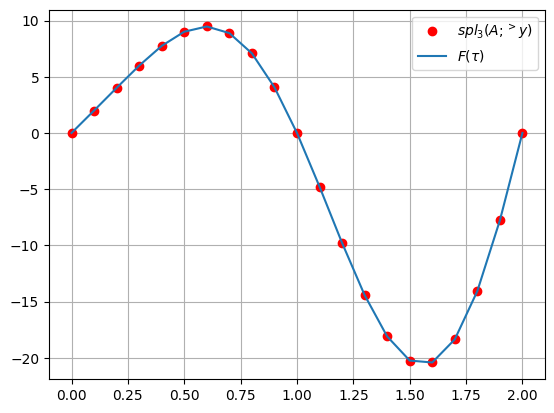

In [ ]:
# Определение сплайна 3-й степени:
def splain(A, t):
    for i in range(len(A)-1):
        if A[i] <= t <= A[i+1]:
            return a_i[i] + b_i[i]*(t - A[i]) + c_i[i]*(t - A[i])**2 + d_i[i]*(t - A[i])**3

# Описание вектора-значений сплайна 3-й степени:
sp_vec = []
for x in A:
    sp_vec.append(splain(A, x))

# Определяем параметы для вывода графиков:
graph_x = np.linspace(0, 2, 21)
splain_values = [splain(A, x) for x in graph_x]
function_values = [F(x) for x in graph_x]

# Вывод графиков:
plt.plot(graph_x, splain_values, 'ro', label='$spl_3(A; {}^{>} y)$')
plt.plot(graph_x, function_values, label='$F(\\tau)$')
plt.legend()
plt.grid()
plt.savefig('1.png')
plt.show()

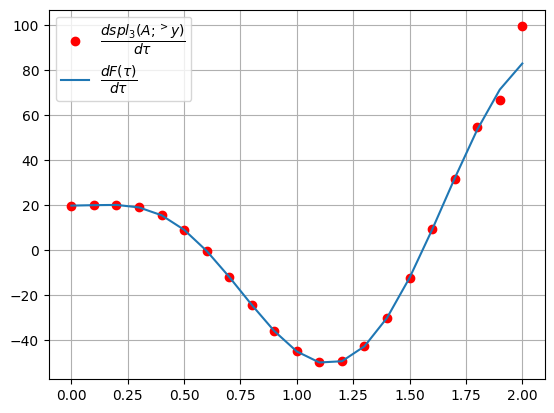

In [ ]:
# Определение производной сплайна 3-й степени:
def splain_derivative(A, t):
    for i in range(len(A)-1):
        if A[i] <= t <= A[i+1]:
            return b_i[i] + 2*c_i[i]*(t - A[i]) + 3*d_i[i]*(t - A[i])**2

# Определение производной функции:
def F_derivative(t):
    return (2 * np.pi * np.cos(np.pi * t) * ((13 * np.sqrt(10) * t**2 + 10)) + 26 * np.sqrt(10) * t * np.sin(np.pi * t)) / np.sqrt(13 * np.sqrt(10) * t**2 + 10)

# Определяем параметы для вывода графиков:
graph_x = np.linspace(0, 2, 21)
splain_derivative_values = [splain_derivative(A, x) for x in graph_x]
function_derivative_values = F_derivative(graph_x)

# Вывод графиков:
plt.plot(graph_x, splain_derivative_values, 'ro', label='$ \dfrac {d spl_3(A; {}^{>} y)} {d \\tau}$')
plt.plot(graph_x, function_derivative_values, label='$\dfrac {d F(\\tau)} {d \\tau}$')
plt.legend()
plt.grid()
plt.savefig('2.png')
plt.show()